# Informations

University of Zurich, <br>
Network Science, <br>
Assignment 1

Pietro Bonazzi, <br>
LEGI 17-200-635, <br>
pietro.bonazzi@uzh.ch

# Libraries

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# A01.1 Building and visualising networks

Parameters: Build each network with 𝑁 = 32 nodes. Note
that these networks are undirected and unweighted.

## Star network
For 𝑁 vertices: 𝑘1 = 𝑁 − 1; 𝑘𝑖 = 1, for 𝑖 > 1

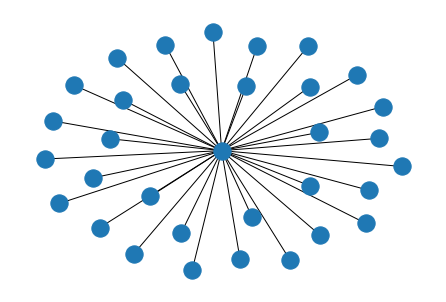

In [3]:
g2 = nx.Graph()
g2.add_node(100)
for i in range(32):
    g2.add_node(i)
    g2.add_edge(100,i)
nx.draw(g2, with_labels = False)

## Fully-Connected

For 𝑁 vertices: 𝑘𝑖 = 𝑁 − 1

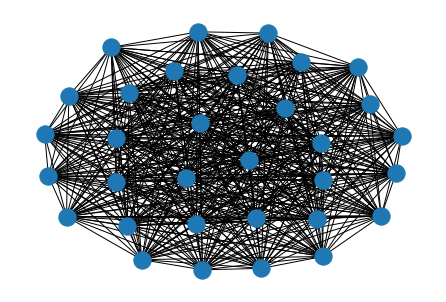

In [4]:
g2 = nx.Graph()
for i in range(32):
    g2.add_node(i)
    for j in range(g2.number_of_nodes()) :
        if (j!=i) :
            g2.add_edge(i,j)
nx.draw(g2, with_labels = False)

In [5]:
g2_degrees = g2.degree()
degrees = [ g2_degrees[i] for i in g2.nodes() ]
print("Nod", g2.number_of_nodes())
print("Min", min(degrees))
print("Max", min(degrees))

Nod 32
Min 31
Max 31


## One-dimensional lattice with periodic boundary conditions
where each node 𝑖 has degree 𝑘𝑖 = 2


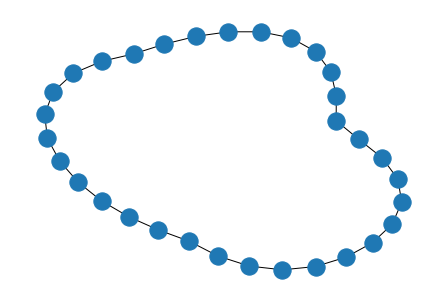

In [6]:
g2 = nx.Graph()
for i in range(32):
    g2.add_node(i)
    if (g2.number_of_nodes()>1) :
        g2.add_edge(i,i-1)
        
g2.add_edge(0,31)
nx.draw(g2, with_labels = False)

In [7]:
g2_degrees = g2.degree()
degrees = [ g2_degrees[i] for i in g2.nodes() ]
print("Nod", g2.number_of_nodes())
print("Min", min(degrees))
print("Max", min(degrees))

Nod 32
Min 2
Max 2


# A01.2 Global properties & Degree Distributions

A. For each one of the networks provided, compute the following network measures
1. Compute the average degree ⟨𝑘⟩ and the density 𝛿 of the networks.
2. Write a function max_degree that takes a network as its argument, and returns two values: the id/name/label of the node with the largest degree, and the value of its degree. Test it on the datasets given.

B. For the same networks, compute and plot the degree distribution 
1. Select axis scales (lin-lin / lin-log / log-log) that allow you to visualise better the distributions. 
2. Remember to bin the data accordingly to the scales selected

In [19]:
def max_degree(graph):
    degreevec = [d for n, d in graph.degree()]
    maxvalue = np.max(degreevec)
    maxid = np.argmax(degreevec)
    return maxid, maxvalue

def degree_distrib(graph):
    fig, ax = plt.subplots()
    plt.title("Degree Distribution")
    plt.ylabel("P(k) - Degree Distribution")
    plt.xlabel("k - Degree")
    
    L=nx.adjacency_matrix(graph).toarray()
    degree=[]
    for i in range(len(L)) : 
        degree.append(L[i].sum())
    
    binlog = np.logspace(np.log10(min(degree)),np.log10(max(degree)+1), 30)
    x, bins, p=plt.hist(degree, binlog, density=True, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
def avg_degree(graph) :
    return (2 * graph.number_of_edges()/graph.number_of_nodes())

def density(graph) : 
    L=nx.adjacency_matrix(graph).toarray().sum()
    N = graph.number_of_nodes()
    return ((2*L)/(N*(N-1)))

## Facebook

Facebook friendships: Nodes represent Facebook users and Edges represent their friendship relations collected from survey participants. 

 J. Leskovec and J. J. Mcauley, Learning to discover social
circles in ego networks, in Advances in Neural Information
Processing Systems, 2012, pp. 539– 547.

In [20]:
g_facebook = nx.read_gml("data/graph_facebook.gml")

Average degree : 43.69101262688784
Density : 0.021639927006878574
MaxDegree : (107, 1045)


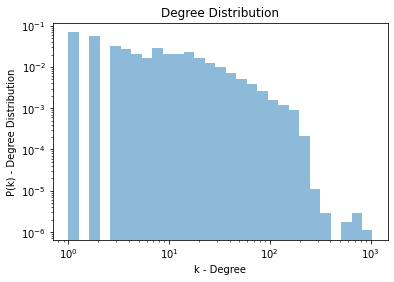

In [21]:
#average degree ⟨𝑘⟩ 
print("Average degree :", avg_degree(g_facebook))

#the density 𝛿 of the networks.
print("Density :", density(g_facebook))

#max degree.
print("MaxDegree :", max_degree(g_facebook))

#degree distribution
degree_distrib(g_facebook)

The majority of the people in this dataset have less than 100 friends on facebook. 

## Zachary Karate Club
Nodes represent members of the club and Edges represent a tie between two members

W. W. Zachary, An information flow model for conflict and
fission in small groups, Journal of Anthropological Research,
33 (1977), pp. 452–473

In [22]:
g_karate = nx.read_gml("data/graph_karate.gml")

Average degree : 4.588235294117647
Density : 0.27807486631016043
MaxDegree : (33, 17)


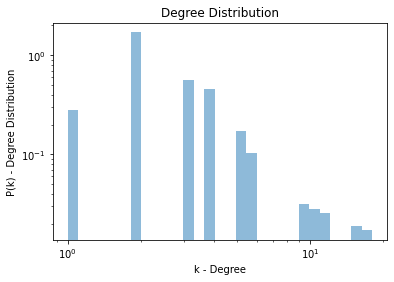

In [23]:
#average degree ⟨𝑘⟩ 
print("Average degree :", avg_degree(g_karate))

#the density 𝛿 of the networks.
print("Density :", density(g_karate))

#max degree.
print("MaxDegree :", max_degree(g_karate))

#degree distribution
degree_distrib(g_karate)

## NetSci collaborations
Nodes represent scientists working in network science and Edges represent co-authorship of at least one paper published up until early 2006 [2]

M. E. J. Newman, Finding community structure in networks
using the eigenvectors of matrices, Physical Review E, 74
(2006)

In [24]:
g_netsci = nx.read_gml("data/graph_netsci.gml")

Average degree : 3.753593429158111
Density : 0.005141908807065905
MaxDegree : (42, 34)


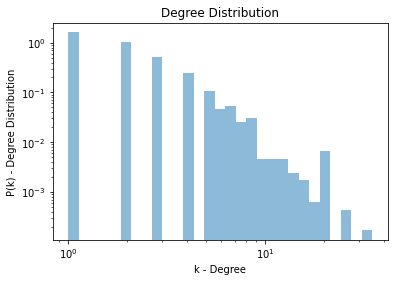

In [25]:
#average degree ⟨𝑘⟩ 
print("Average degree :", avg_degree(g_netsci))

#the density 𝛿 of the networks.
print("Density :", density(g_netsci))

#max degree.
print("MaxDegree :", max_degree(g_netsci))

#degree distribution
degree_distrib(g_netsci)